In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from rlglue import rl_glue as RLGlue
from agents import QLearningAgent # import agent
from environments import TwoChoiceMDP # import environment

100%|██████████| 10/10 [00:09<00:00,  1.03it/s]


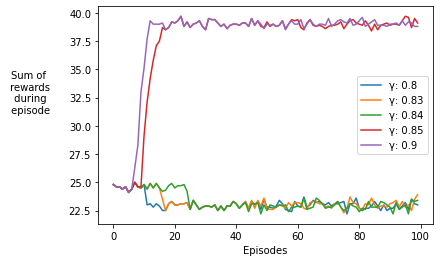

In [2]:
np.random.seed(0)

agents = {
    "Q-learning": QLearningAgent,
}
env = TwoChoiceMDP
all_reward_sums = {} # Contains sum of rewards during episode
all_state_visits = {} # Contains state visit counts during the last 10 episodes
agent_info = {"num_actions": 2, "num_states": 9, "epsilon": 0.1, "step_size": 0.5}
env_info = {}
num_runs = 10 # The number of runs
num_episodes = 100 # The number of episodes in each run

discount_rates = [0.8, 0.83, 0.84, 0.85, 0.9]

for discount_rate in discount_rates:
    agent_info["discount"] = discount_rate
    
    all_reward_sums[discount_rate] = []
    all_state_visits[discount_rate] = []
    
    for run in tqdm(range(num_runs)):
        agent_info["seed"] = run
        rl_glue1 = RLGlue.RLGlue(env, agents["Q-learning"])
        rl_glue1.rl_init(agent_info, env_info)

        reward_sums = []
        state_visits = np.zeros(9)
        for episode in range(num_episodes):
            r_sum = 0
            
            # Runs an episode while keeping track of visited states
            state, action = rl_glue1.rl_start()
            state_visits[np.where(state == 1)[0][0]] += 1
            for i in range(0, 100):
                reward, state, action, is_terminal = rl_glue1.rl_step()
                r_sum += reward
                state_visits[np.where(state == 1)[0][0]] += 1
            reward_sums.append(r_sum)
            last_episode_total_reward = r_sum
            
        all_reward_sums[discount_rate].append(reward_sums)
        all_state_visits[discount_rate].append(state_visits)

# plot results
for discount_rate in discount_rates:
    plt.plot(np.mean(all_reward_sums[discount_rate], axis=0), label="γ: " + str(discount_rate))
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode",rotation=0, labelpad=40)
plt.legend()
plt.show()